In [25]:
#!pip install selenium

In [28]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [29]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## 1) Extract reviews of any product from ecommerce website amazon
## 2) Perform sentimental analysis

In [ ]:
#Data Collection

In [31]:
oneplus_reviews=[]

In [32]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [33]:
oneplus_reviews = list(set(oneplus_reviews))

In [35]:
oneplus_reviews

["\n\n  A One plus user.Oneplus One -> Oneplus 3T -> Oneplus 7T.I don't like other android phones due it's UI, love stock android.Camara is awesomeFacing problem with notifications, don't know what at top.I was expecting great battery but its average.As i moved from 3T to 7T, I had to buy wireless headphones and was worried about this. But Bluetooth connection is also good/stable.\n\n",
 '\n\n  This phone has great performance, good camera and ambiance. Charging is fast as per the Oneplus standards set in earlier phones. What is concerning me is the heating issue which crops up off and on. The Battery drains quickly so we have to keep it at 60Hz to longer life. Is there anyone else feeling the heating issues?\n\n',
 "\n\n  THIS IS ONE OF THE WORST PHONE I HAVE EVER PURCHASED. PLEASE DONT BUY THIS PHONE AND PUT YOUR HARD EARNED MONEY ON STAKE. THERE ARE SO MANY CONS IN THIS PHONE. EARLIER I HAVE USED ONE PLUS 5T PHONE SO I KNEW WHAT TO EXPECT FROM THIS PHONE BUT THIS TIME I AM SO MUCH D

In [34]:
#Text Preprocessing

In [36]:
txt_upd = ' '.join(oneplus_reviews)

In [37]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [38]:
text_tokens = word_tokenize(txt_upd)

In [39]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [40]:
tokens_without_sw

['plus',
 'user',
 'oneplus',
 'oneplus',
 'oneplus',
 'like',
 'android',
 'phones',
 'due',
 'ui',
 'love',
 'stock',
 'android',
 'camara',
 'awesomefacing',
 'problem',
 'notifications',
 'know',
 'top',
 'expecting',
 'great',
 'battery',
 'average',
 'moved',
 'buy',
 'wireless',
 'headphones',
 'worried',
 'bluetooth',
 'connection',
 'good',
 'stable',
 'phone',
 'great',
 'performance',
 'good',
 'camera',
 'ambiance',
 'charging',
 'fast',
 'oneplus',
 'standards',
 'set',
 'earlier',
 'phones',
 'concerning',
 'heating',
 'issue',
 'crops',
 'battery',
 'drains',
 'quickly',
 'keep',
 'hz',
 'longer',
 'life',
 'anyone',
 'else',
 'feeling',
 'heating',
 'issues',
 'worst',
 'phone',
 'ever',
 'purchased',
 'please',
 'dont',
 'buy',
 'phone',
 'put',
 'hard',
 'earned',
 'money',
 'stake',
 'many',
 'cons',
 'phone',
 'earlier',
 'used',
 'plus',
 'phone',
 'knew',
 'expect',
 'phone',
 'time',
 'much',
 'disappointed',
 'concerns',
 'screen',
 'resolution',
 'quality',
 's

In [41]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(tokens_without_sw)

In [42]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [43]:
df

,adapter,adaptor,added,always,amazing,amazon,ambiance,amoeld,amoled,android,angle,another,antutu,anymore,anyone,aperture,app,apple,around,arrived,aspects,audible,average,avg,awesome,awesomefacing,back,background,backup,balanced,banding,base,battery,beautiful,believe,benefit,best,better,big,bigger,...,upgrade,upso,usage,used,useful,user,users,using,variant,variants,video,view,vivo,vlogging,voice,volume,volumes,wants,warp,waste,watch,watt,weighed,weight,welcome,well,wide,wired,wireless,wondering,work,worried,worst,would,wounds,writing,year,years,youtube,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
word_list = ' '.join(df)

In [45]:
word_list

'adapter adaptor added always amazing amazon ambiance amoeld amoled android angle another antutu anymore anyone aperture app apple around arrived aspects audible average avg awesome awesomefacing back background backup balanced banding base battery beautiful believe benefit best better big bigger bit blazing blindly bloatware blogging blood bluetooth blur blurred blurrry blutooth bought box brainer brand brick broken budget bulk bumpperformance butter buy caller calls camara came camera cameras capability capacitycamera capture carried carry case cast channel charge charger charges charging chipset circulation class clear clicked clicking clicks colleagues color colors coming compared comparision comparison concerning concerns conference connection cons consistent consno consumer consumes continued converter copy cost could cover cpu crisp crops curator customer day days deep defect delivery describe design desk detailed detailing details device devices directly disappointed disappoint

In [46]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

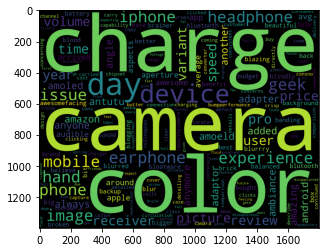

In [47]:
plt.imshow(wordcloud)

In [ ]:
#Sentiment Analysis

In [48]:
with open("/content/sample_data/positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [52]:
positive_words[35:]

In [57]:
with open("/content/sample_data/negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [59]:
negative_words[35:]

In [60]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [61]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

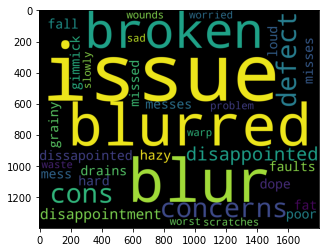

In [62]:
plt.imshow(wordcloud_neg)

In [63]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [64]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

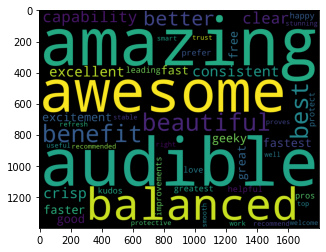

In [65]:
plt.imshow(wordcloud_pos)